In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [3]:
# --- Exploratory Data Analysis (EDA) ---
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   

In [4]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64


In [5]:
# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(data.describe())


Basic statistics of numerical columns:
        CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878     


Distribution of Conversion plotted and saved as 'conversion_distribution.png'


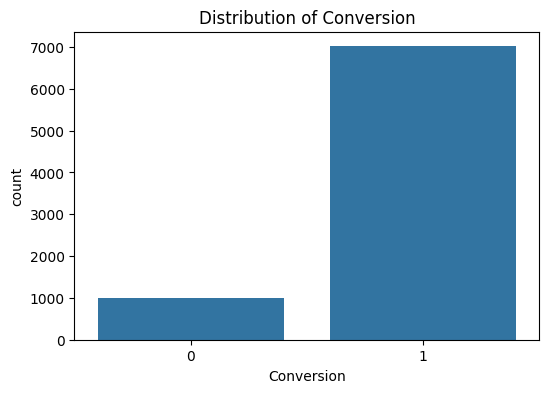

In [7]:
# Distribution of the target variable 'Conversion'
plt.figure(figsize=(6, 4))
sns.countplot(x='Conversion', data=data)
plt.title('Distribution of Conversion')
print("\nDistribution of Conversion plotted and saved as 'conversion_distribution.png'")


Correlation heatmap plotted and saved as 'correlation_heatmap.png'


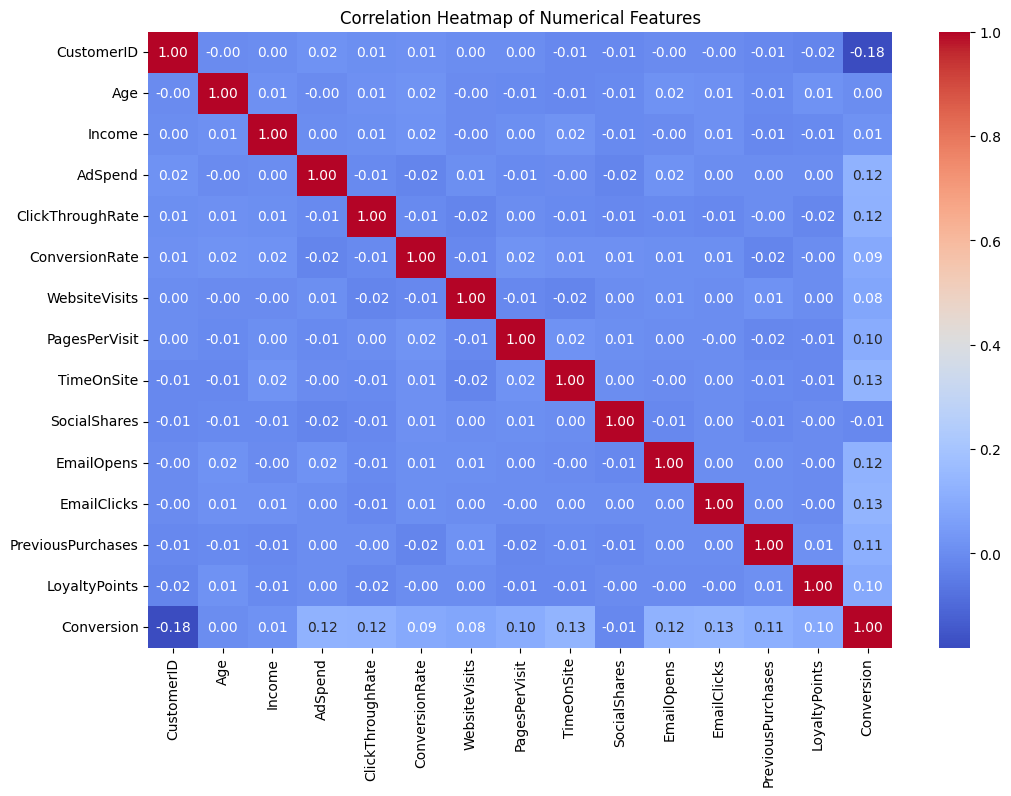

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
print("\nCorrelation heatmap plotted and saved as 'correlation_heatmap.png'")


Age distribution by Conversion plotted and saved as 'age_conversion_boxplot.png'


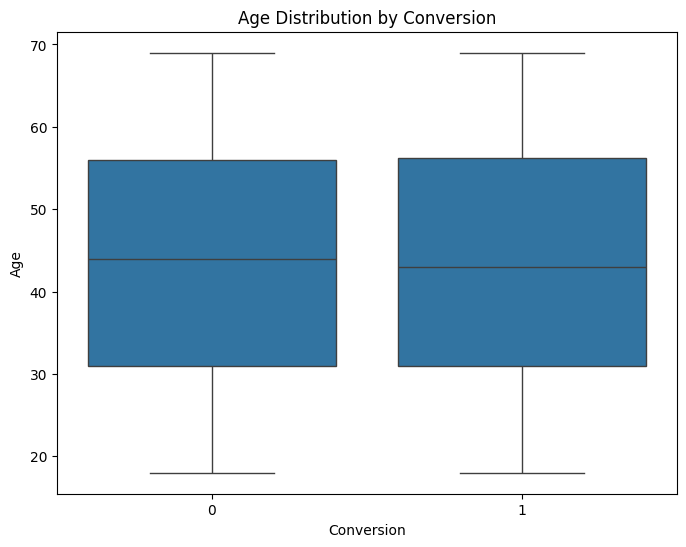

In [10]:
# Distribution of Age by Conversion
plt.figure(figsize=(8, 6))
sns.boxplot(x='Conversion', y='Age', data=data)
plt.title('Age Distribution by Conversion')
print("\nAge distribution by Conversion plotted and saved as 'age_conversion_boxplot.png'")

In [11]:
# --- Data Preprocessing ---
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(['CustomerID', 'Conversion'], axis=1)  # Drop CustomerID as it's not a feature
y = data['Conversion']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# --- Supervised Learning Models ---
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [15]:
# Dictionary to store results
results = {}


Training Logistic Regression...
Confusion matrix for Logistic Regression saved as 'confusion_matrix_logistic_regression.png'

Training Decision Tree...
Confusion matrix for Decision Tree saved as 'confusion_matrix_decision_tree.png'

Training Random Forest...
Confusion matrix for Random Forest saved as 'confusion_matrix_random_forest.png'

Training SVM...
Confusion matrix for SVM saved as 'confusion_matrix_svm.png'

Training KNN...
Confusion matrix for KNN saved as 'confusion_matrix_knn.png'

Training Gradient Boosting...
Confusion matrix for Gradient Boosting saved as 'confusion_matrix_gradient_boosting.png'

Training Naive Bayes...
Confusion matrix for Naive Bayes saved as 'confusion_matrix_naive_bayes.png'


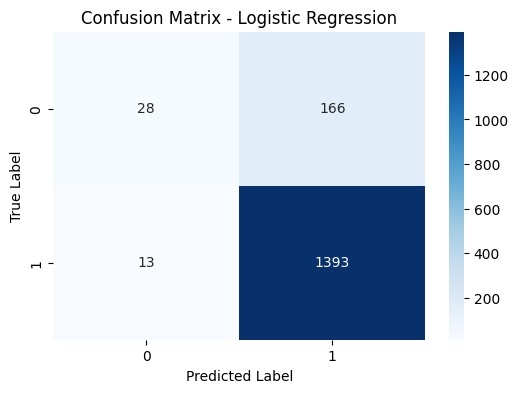

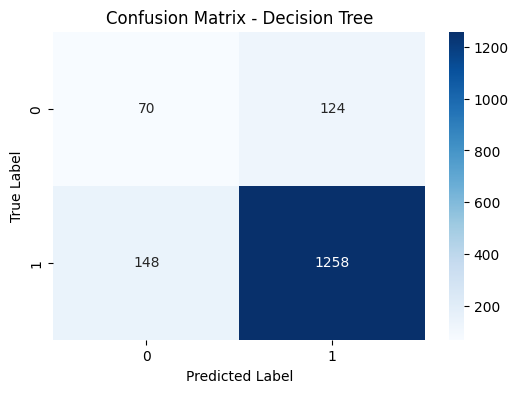

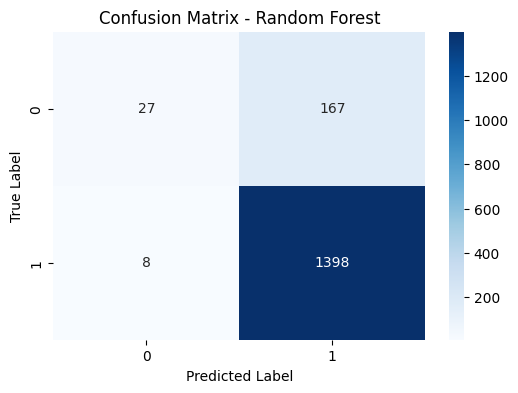

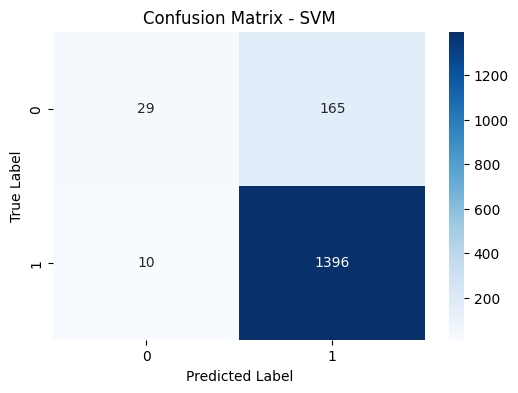

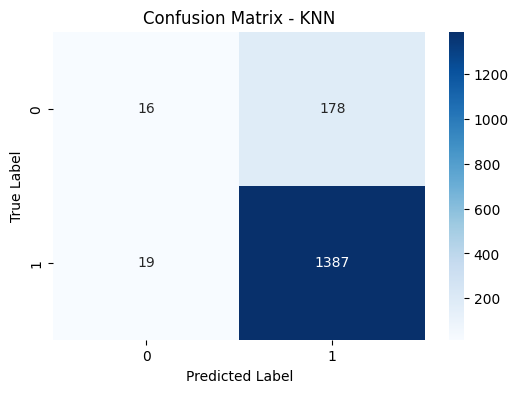

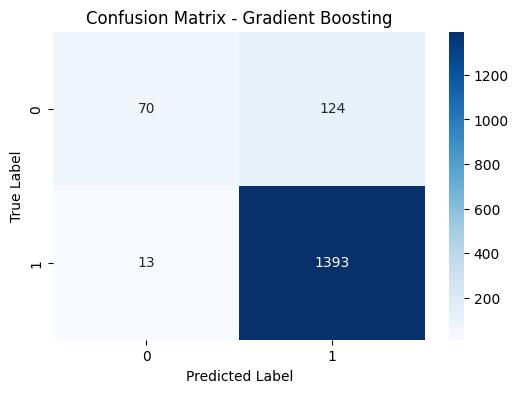

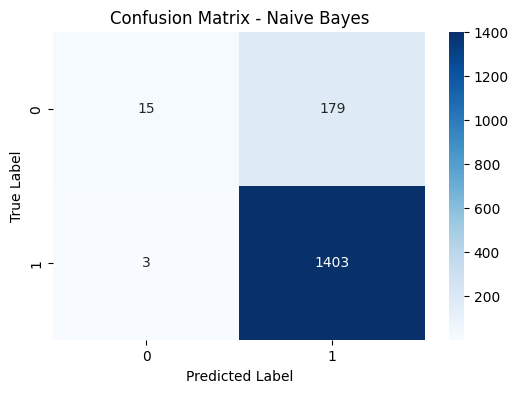

In [31]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    print(f"Confusion matrix for {model_name} saved as 'confusion_matrix_{model_name.lower().replace(' ', '_')}.png'")

In [29]:
# Display the results
print("\nModel Performance Summary:")
results_df = pd.DataFrame(results).T
print(results_df)


Model Performance Summary:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.888125   0.893521  0.990754  0.939629
Decision Tree        0.830000   0.910275  0.894737  0.902439
Random Forest        0.890625   0.893291  0.994310  0.941097
SVM                  0.890625   0.894299  0.992888  0.941018
KNN                  0.876875   0.886262  0.986486  0.933692
Gradient Boosting    0.914375   0.918260  0.990754  0.953130
Naive Bayes          0.886250   0.886852  0.997866  0.939090
